# Modélisation du problème - Projet Green Graph
*Equipe CesiCDP - Chef de projet : Leila | Opérateurs : Tom, Edwin*</br>
## Sommaire :
    1. Introduction
    2. Définition du problème 
        2.1. Description du problème de tournée de livraison
        2.2. Contraintes
        2.3. Objectifs d’optimisation
    3. Modélisation formelle
        3.1. Hypothèses générales
        3.2. Représentation formelle du réseau
        3.3. Présentation des contraintes supplémentaires retenues
        3.4. Représentation formelle des contraintes choisies
    4. Analyse de la complexité
        4.1. Classification du problème
        4.2. Impact des contraintes supplémentaires sur la complexité
    5. Plan de Travail et Organisation du Projet
        5.1. Étapes prévues 
        5.2. Répartition des tâches dans l’équipe
        5.3. Outils utilisés 
    6. Conclusion
    7. Annexes
        7.1. Glossaire des termes techniques
        7.2. Références bibliographiques

### 1. Introduction

Depuis les années 90, la question environnementale s'est imposé comme une priorité mondiale. Réduction de la consommation d’énergie, diminution des émissions de gaz à effet de serre, développement des mobilités durables… de nombreux objectifs ont été fixés, notamment via des accords internationaux (Protocole de Kyoto, Accords de Paris) et des politiques nationales.

Dans ce cadre, L'ADEME  (Agence de l’Environnement et de la Maîtrise de l’Energie) avec la collaboration de CesiCDP, cherche à optimiser la tournée de ses transports en commun afin de réduire ses coûts financiers et son bilan carbone.

**Comment concevoir une tournée de livraison sur un réseau routier reliant plusieurs points, de manière à minimiser la consommation (temps, distance, carburant, etc.), tout en respectant certaines contraintes opérationnelles (capacités des véhicules, horaires de livraison, etc.) ?**

Ce problème s’apparentant au problème du voyageur de commerce, est connu pour sa complexité algorithmique. Cependant, il est applicable à de nombreux domaines logistiques (livraison de colis, gestion des déchets, interventions technique, etc.).    
Les résultats obtenus pourront être adaptés à différentes tailles de réseau et différents types de territoires (urbain, rural).

L'objectif sera de proposer dans un premier temps une modélisation formelle du problème avec des représentations mathématiques et une analyse de la complexité.   
Par la suite une implémentation des algorithmes avec une démonstration du fonctionnement de celle-ci sur différents cas de test.   
On terminera par une étude expérimentale de nos solutions qui mettra en évidence les perfomances et les limitations de nos algorithmes ainsi qu'une perspective d'amélioration basé sur notre analyse.

### 2. Définition du problème
##### 2.1 Description du problème de tournée de livraison
Dans le cadre de ce projet, on s’intéresse à un problème de logistique urbaine consistant à **planifier une tournée de livraison sur un réseau routier**. L'objectif est de trouver un ou plusieurs itinéraires optimaux pour effectuer des livraisons à un ensemble de points (clients, villes, etc.) à partir d’un point de départ, tout en respectant un ensemble de contraintes (capacités, horaires, accessibilités…).   

Une tournée de livraison telle que nous l'entendons s'apparente au **problème du voyageur de commerce (PVC)** qui consiste à déterminer un itinéraire, le plus court possible, passant par chaque ville une seule fois. 

##### 2.2. Contraintes
L’objectif principal est de minimiser la consommation de ressources, selon plusieurs critères possibles :
| Contraintes | Description |
| ----------- | ----------- |
| Fenêtres temporelles | Chaque point de livraison doit être visité dans un intervalle de temps défini |
| Coût ou restriction sur certaines routes | Certaines routes peuvent être interdites (travaux, fermetures) ou présenter un coût plus élevé (péages, zones réglementées) |
| Dépendances entre visites | Certaines villes doivent être visitées dans un ordre précis |
| Routes dynamiques ou perturbations | Les conditions de circulation peuvent évoluer, modifiant les coûts ou les temps de trajet.  |
| Utilisation de plusieurs véhicules | Le problème peut impliquer plusieurs véhicules réalisant des tournées distinctes, chacun ayant un itinéraire propre |
| Capacités du véhicule | Chaque véhicule a une capacité maximale |
| Équilibrage de la charge des véhicules  | Lorsque plusieurs véhicules sont utilisés, les livraisons doivent être réparties de manière équilibrée pour éviter une surcharge d’un véhicule |

##### 2.3. Objectifs d’optimisation

Notre équipe a pour objectif de mettre en place un algorithme qui prendra en compte **deux contraintes** parmis celles présentées ci-dessus tout en choisissant un chemin le plus court possible.   
Nous prévoyons deux algorithmes de path finding : **l'algorithme A\* et un algorithme génétique**.

### 3. Modélisation formelle
##### 3.1. Hypothèses générales
On pourrais représenter le **réseau routier** par un graphe pondéré, non orienté connexe et complet. C'est à dire qu'on ne prend pas en compte le sens de la circulation, toutes les villes sont accessibles entre elles donc aucune ville n’est isolée et chaque ville est directement reliée à toutes les autres.    

Les **points de livraison (villes)** sont représentés comme des nœuds/sommets du graphe et les routes par les arêtes.   
Le **dépôt** (point de départ et d’arrivée) est un sommet aléatoire, **un seul véhicule** pars du dépôt, effectue les livraisons puis revient au dépôt.   
Chaque point de livraison doit être visité **une et une seule fois**, le coût associé à chaque arête correspond à la **distance entre chaque point**. L'objectif est de trouver l'itinéraire avec le coût le plus faible.

##### 3.2. Représentation formelle du réseau
On modélise le réseau routier par un graphe $G = (V,E)$ où :
* $V = \{v_0,v_1,v_2,...,v_n\}$ est l’ensemble des sommets représentant le dépôt et les points de livraison
* On note le sommet du dépot, $v0$
* $E$ est l’ensemble des arêtes représentant les routes entre les sommets, chaque arête du graphe relie deux sommets de $V$, il contient toutes les paires $(u, v)$ représentant les connexions (routes) dans le graphe.
* $c_{uv}$ est le coût associé à l’arête $(u,v) ∈ E$
* $x_{uv} ∈ \{0,1\}$ est une variable binaire indiquant si l’arête $(u,v)$ est utilisée dans la tournée

##### 3.3. Présentation des contraintes supplémentaires retenues
Dans notre cas, nous avons choisi deux contraintes supplémentaires qui rendent la modélisation plus réaliste :
* **Coût ou restriction de passage sur certaines arêtes :** Certaines routes peuvent être plus coûteuses ou interdites (par exemple, travaux ou routes bloquées).
* **Dépendances entre visites :** Une ville ne peut être visitée qu'après en avoir visité une autre (par exemple, une livraison doit précéder une collecte).   

##### 3.4. Représentation formelle des contraintes choisies
Certaines arêtes $(u,v)$ sont interdites, on note l' ensemble $E_{interdit}$ sous ensemble propre de l'ensemble $E$ : $E_{interdit} ⊂ E$, qui représente les routes sur lesquelles le véhicule n’a pas le droit de passer. Si l'arête $(u,v) ∈ E_{interdit}$ alors $x_{uv} = 0$.   
On cherche à à minimiser la somme des coûts des arêtes utilisées, $\min \sum_{(u,v) \in E} c_{uv} \cdot x_{uv}$. Le produit $c_{uv} \cdot x_{uv}$ permet de calculer le coût uniquement lorsque l’arête est utilisée.




### 4. Analyse de la complexité

##### 4.1. Classification du problème
##### **Démonstration de la NP-Complétude du Problème du Voyageur de Commerce (PVC)**

##### **Construction de l'instance de PVC**
*inserer une image représentant les graphes*    
Soit $(I_{CH})$ une instance du Cycle Hamiltonien sur un graphe $(G = (V, E))$. Nous construisons une instance $(I_{PVC})$ de PVC comme suit :
1. **Graphe $(G' = (V, E'))$** : 
   - $(E')$ contient toutes les arêtes de $(G)$ avec un coût de **1**.
   - Les arêtes absentes de $(G)$ (i.e., celles de son complément $(\overline{G})$) sont ajoutées à $(E')$ avec un coût de **2**.
2. **Valeur $(k = |V|)$** : La longueur maximale autorisée pour le cycle PVC est fixée à $(|V|)$.

Cette construction s'effectue en temps polynomial (en $(O(|V|^2))$).

##### **Réduction et Preuve d'Équivalence**
1. **Si $(G)$ a un Cycle Hamiltonien** :
   - Ce cycle utilise exactement $(|V|)$ arêtes de $(G)$, toutes de coût **1**.
   - Dans $(I_{PVC})$, ce cycle correspond à un circuit de coût total $(|V|)$, répondant "oui" à $(I_{PVC})$.

2. **Si $(I_{PVC})$ répond "oui"** :
   - Le circuit PVC a un coût $(\leq |V|)$. Comme les arêtes de $(\overline{G})$ coûtent **2**, le circuit ne peut en utiliser aucune (sinon le coût total dépasserait $(|V|)$).
   - Le circuit utilise donc uniquement des arêtes de $(G)$, formant un Cycle Hamiltonien dans $(G)$.

3. **Si $(G)$ n'a pas de Cycle Hamiltonien** :
   - Tout circuit PVC dans $(G')$ doit utiliser au moins une arête de $(\overline{G})$, ce qui entraîne un coût $(\geq |V| + 1)$.
   - $(I_{PVC})$ répond donc "non".


##### **Conclusion**
**PVC est NP-Difficile** : Toute instance du PVC (NP-Complet) se réduit polynomialement au cycle hamiltonien, de fait il est au moins aussi difficile que le problème du cycle hamiltonien, conjugué au PVC il devient donc NP-Complet (NP + NP-Difficile).

##### 4.2. Impact des contraintes supplémentaires sur la complexité
L'implémentation de contraintes supplémentaires ne modifie pas la complexité du problème. En effet, seule la pondération des arêtes change, ce qui signifie que le problème se réduit toujours polynomialement au cycle hamiltonien. Même s’il a désormais moins de chances d’admettre une solution correspondant à un cycle hamiltonien, cette solution n’est pas exclue. Le problème reste donc au moins aussi difficile que celui du cycle hamiltonien, et demeure ainsi NP-complet.

### 5. Plan de Travail et Organisation du Projet
##### 5.1. Étapes prévues 
| Date de livraison | Description | Etat |
| ----------- | ----------- | - |
| **09/04/2025 - 15/04/2025** | **Livrable 1** | ❌ |
| 09/04/2025 - 09/04/2025 | Reformulation de la problématique | ✅ |
| 09/04/2025 - 12/04/2025 | Calcul de complexité | ✅ | 
| 10/04/2025 - 14/04/2025 | Représentation formelle des données | ✅ |
| 10/04/2025 - 12/04/2025 | Représentation formelle des problèmes | ✅ |
| 13/04/2025 - 15/04/2025 | Représentation formelle des contraintes | ✅ | 
| **15/04/2025 - 28/04/2025** | **Livrable 2** | ❌ |
| 15/04/2025 - 28/04/2025 | Mise à jour de la modélisation du livrable 1  | ❌ |
| 15/04/2025 - 16/04/2025 | Décrit les méthodes de résolution choisies : détails sur les algorithmes utilisés | ❌ |
| 15/04/2025 - 17/04/2025 | L’implémentation de ces algorithmes | ❌ |
| 16/04/2025 - 18/04/2025 | Etude expérimentale : Plan d'expérience | ❌ |
| 18/04/2025 - 19/04/2025 | Etude expérimentale : benchmarks | ❌ |
| 20/04/2025 - 24/04/2025 | Etude expérimentale : limitations / améliorations possibles | ❌ |

##### 5.2. Outils utilisés 
- VSCode
- Jupyter notebook
- Git/Github
- Office
- pandoc

**Langages et librairies :**
- Python 3.12
- Package de lib pour OpenStreetMap
- matplotlib
- numpy
- ipywidgets

### 6. Conclusion
En résumé, notre travail s'inscrit dans un cadre environnelental et opérationel, avec l'objectif de proposer des solutions optimales au problème des tournées de livraison dans un réseau routier.

En nous appuyant sur la représentation mathématique du Problème du Voyageur de Commerce (PVC), nous avons modélisé le problème en tenant compte des contraintes réelles telles que les coûts de passage, les interdictions de certaines routes, ou encore les dépendances entre livraisons.

L’étude de la complexité nous a permis de mieux appréhender la résolution exacte du problème, en mettant en évidence son appartenance à la classe des problèmes NP-complets.<br>
Cela a justifié notre choix d’implémenter des algorithmes adaptés, capables de produire des solutions satisfaisantes dans un temps raisonnable, tout en respectant les contraintes spécifiques du problème.

L’ensemble des étapes prévues dans notre plan de travail a été structuré pour répondre progressivement à la problématique. Ainsi, cette étude constitue une base solide dans les domaines de la logistique, du transport durable et de la recherche opérationnelle.

### 7. Annexes
##### 7.1. Glossaire des termes techniques
- **Chemin Hamiltonien** : Un chemin hamiltonien est un chemin passant par tous les sommets d'un graphe sans repasser sur les arêtes.
- **Cycle Hamiltonien** : Un cycle hamiltonien est un chemin hamiltonien faisant un cycle.
- **Graphe pondéré** : Un graphe pondéré possède une pondération sur ses arêtes permettant de statuer de leur valeur.
- **Graphe connexe** : un graphe est connexe lorsque tous ses sommets sont reliés par des arêtes et forment un seul corps. 
- **Graphe complet** : Un graphe complet possède des arêtes pour chacun de ses sommets, les reliants à tous les autres sommets du graphe.
- **Degré** : le degré d'un sommet correspond au nombre d'arêtes connectées à celui-ci.
- **Ordre** : L'ordre d'un graphe est son nombre de sommets.
- **NP, NP-Difficile, NP-Complet** : En informatique théorique, et plus précisément en théorie de la complexité, une classe de complexité est un ensemble de problèmes algorithmiques dont la résolution nécessite la même quantité d'une certaine ressource.
- **Algorithme de pathfinding** : Autrement dit , la recherche de chemin,  consiste à trouver comment se déplacer dans un environnement entre un point de départ et un point d'arrivée en prenant en compte différentes contraintes.
- **Algorithme heuristique** : Un algorithme heuristique est un procédé qui permet d’obtenir une solution réalisable très rapidement à un problème d’optimisation complexe. La solution fournie en sortie de l’algorithme n’est cependant pas garantie d’être optimale. 
- **Algorithme A\*** : Algorithme heuristique qui permet de trouver très rapidement un plus court chemin entre deux points avec d’éventuels obstacles. Comparé à l'algorithme heuristique, il renvoie directement le premier chemin qu’il a déterminé. 
- **Algorithme évolutionnistes** : [L'expression « algorithmes évolutionnaires » ou « algorithmes évolutionnistes » (evolutionary algorithms en anglais) désigne une famille d'algorithmes qui s'inspirent de la théorie de l'évolution pour résoudre divers problèmes complexes.](https://www.cyberjustice.ca/2020/12/15/les-techniques-algorithmiques-de-lia-les-algorithmes-evolutionnaires/#:~:text=L'expression%20%C2%AB%20algorithmes%20%C3%A9volutionnaires%20%C2%BB,pour%20r%C3%A9soudre%20divers%20probl%C3%A8mes%20complexes.)
- **Algorithmes génétiques** : [appartiennent à la famille des algorithmes évolutionnistes. Leur but est d'obtenir une solution approchée à un problème d'optimisation, lorsqu'il n'existe pas de méthode exacte (ou que la solution est inconnue) pour le résoudre en un temps raisonnable.](https://fr.wikipedia.org/wiki/Algorithme_g%C3%A9n%C3%A9tique#:~:text=Les%20algorithmes%20g%C3%A9n%C3%A9tiques%20appartiennent%20%C3%A0,r%C3%A9soudre%20en%20un%20temps%20raisonnable.)
##### 7.2. Références bibliographiques

* [Complexité algorithmique avancée : Ivan Lavalée, 2008](https://univ.scholarvox.com/book/88814753)
* [Algorithmes Notions de base : Thomas H. Cormen, 2013](https://univ.scholarvox.com/catalog/book/docid/88817457)
* [À la découverte des graphes et des algorithmes de graphes : Christian Laforest, 2017](https://univ.scholarvox.com/catalog/book/docid/88840776)
* [Comparative Analysis of Genetic Algorithm, Ant Colony Optimisation and Particle Swarm Optimisation on the Travelling Salesman Problem and the 0/1 Knapsack Problem](https://ieeexplore.ieee.org/document/10874078)
* [Relationship between Genetic Algorithms and Ant Colony Optimization Algorithms](https://www.cnc.una.py/publicaciones/1_86.pdf)

### 8. Données de Test
Pour répondre à ce problème nous utiliserons les villes de france obtenu grâce à World City DB. 

In [45]:
def geocode_city(city_name):
    from geopy.geocoders import Nominatim
    """Converts a city name to coordinates (latitude, longitude)"""
    geolocator = Nominatim(user_agent="routing_app", timeout=10)
    location = geolocator.geocode(city_name,country_codes="FR")
    
    if location:
        return (location.latitude, location.longitude)
    else:
        return None, None

In [46]:
def GenerateCityMapFromCSV(size):
    """Generates a list of cities from a CSV file"""
    import pandas as pd
    import random
    city_map = {} 
    df = pd.read_csv("CityName.csv", on_bad_lines='skip')
    city_list = df['City'].dropna().tolist()
    city_list = random.sample(city_list, size)
    for city in city_list:
        lat, lon = geocode_city(city) 
        if  (lat or lon) is not None:
            city_map[city] = (lat,lon)
    return city_map

Cities = GenerateCityMapFromCSV(10)

In [47]:
def calculate_travel_time(departure_city, arrival_city, city_map, mode, osrm_link, params):
    """
    Calculates travel time between two cities using the OSRM API
    
    Args:
        departure_city (str): Name of the departure city
        arrival_city (str): Name of the arrival city
        mode (str): Transportation mode (driving, cycling, walking)
        
    Returns:
        tuple: (time in seconds, distance in meters, formatted time)
    """
    import requests
    
    # Get city coordinates
    try:
        lat1, lon1 = city_map[departure_city]
        lat2, lon2 = city_map[arrival_city]
    except ValueError as e:
        return (None, None, str(e))
    
    # Building the URL for the OSRM API
    url = f"{osrm_link}/{mode}/{lon1},{lat1};{lon2},{lat2}"

    # Call to the OSRM API
    response = requests.get(url, params=params, timeout=10)
    
    if response.status_code != 200:
        return (None, None, f"Error during API call: {response.status_code}")
    
    data = response.json()
    
    if data["code"] != "Ok":
        return (None, None, f"OSRM API error: {data['code']}")
    
    # Extracting time and distance information
    route = data["routes"][0]
    duration_seconds = route["duration"]
    distance_meters = route["distance"]
    
    # Formatting time for display
    hours, remainder = divmod(duration_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    
    formatted_time = ""
    if hours > 0:
        formatted_time += f"{int(hours)} hour{'s' if hours > 1 else ''} "
    if minutes > 0:
        formatted_time += f"{int(minutes)} minute{'s' if minutes > 1 else ''}"
    
    return (duration_seconds, distance_meters, formatted_time.strip())

def display_route(departure_city, arrival_city, city_map, mode, osrm_link, params):
    """Displays route information between two cities"""
    modes = {
        "driving": "by car",
        "cycling": "by bicycle",
        "walking": "on foot"
    }
    
    duration, distance, message = calculate_travel_time(departure_city, arrival_city, city_map, mode, osrm_link, params)
    
    if duration is None:
        print(message)
        return
    
    print(f"Route from {departure_city} to {arrival_city} {modes.get(mode, '')}:")
    print(f"Travel time: {message}")
    print(f"Distance: {distance/1000:.1f} km")



In [48]:
### Matrix generation ###

# Give a list of cities, a moving mode, your OSRM link, a hashmap of parameters to customize your request and a boolean for the printable version or the compute version
# Returns a matrix with the duration as seconds and the distance as kilometers
def matrix_generation(cities, mode, link, params, toPrint=False):
    import pytz
    from datetime import datetime

    matrix = []

    for sourceCity in cities:
        submatrix = []
        for destinationCity in cities:
            if sourceCity is not destinationCity:
                duration, distance, _ = calculate_travel_time(sourceCity, destinationCity, cities, mode, link, params)
                if toPrint:
                    submatrix.append([datetime.fromtimestamp(duration, tz=pytz.utc).strftime('%H:%M:%S'), int(distance / 1000)])
                else:
                    submatrix.append([duration, int(distance / 1000)])
            else:
                submatrix.append([0, 0])
        matrix.append(submatrix)

    return matrix


from tabulate import tabulate

link = "http://router.project-osrm.org/route/v1"
params = {
    "overview": "false",
    "alternatives": "false",
    }
matrix = matrix_generation(Cities, "driving", link, params)
printable_matrix = matrix_generation(Cities, "driving", link, params, True)
print("\n\nListes [durée (s), distance (km)]\n\n" + tabulate(printable_matrix, headers=Cities, showindex=Cities, tablefmt="fancy_grid"))
print(printable_matrix)
print(matrix)



Listes [durée (s), distance (km)]

╒═══════════════════════╤═══════════════════════╤═══════════════════╤═════════════════════════╤════════════════════╤════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤════════════════════╕
│                       │ Le Pont de La Chaux   │ Champnetery       │ Boutiers-Saint-Trojan   │ Faubourg du Bois   │ Cabrolles          │ Giry              │ Le Clauzel        │ Prosnes           │ Gandren           │ Le Hallay          │
╞═══════════════════════╪═══════════════════════╪═══════════════════╪═════════════════════════╪════════════════════╪════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪════════════════════╡
│ Le Pont de La Chaux   │ [0, 0]                │ ['05:47:52', 438] │ ['07:43:11', 593]       │ ['03:54:49', 337]  │ ['07:08:56', 584]  │ ['03:51:54', 292] │ ['06:47:45', 589] │ ['04:18:22', 396] │ ['04:46:21', 419] │ ['08:12:11', 760]  │
├──────

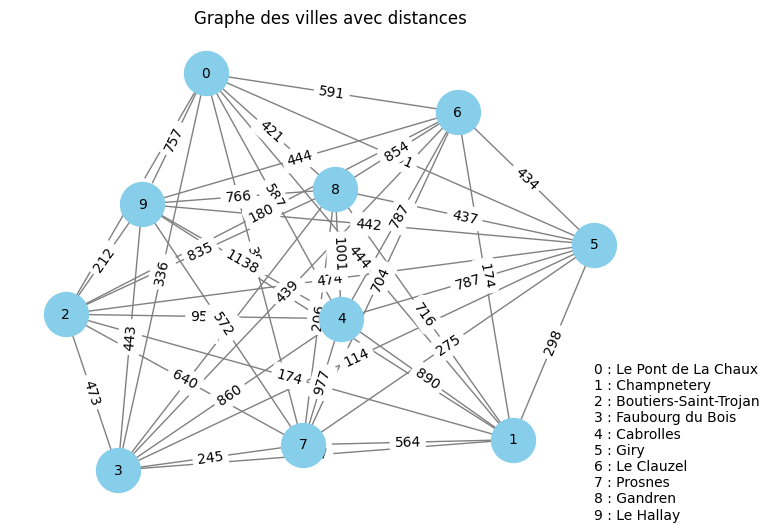

In [49]:
### Generate graph
def generate_complete_graph(matrix, cities):
    import networkx as nx
    import matplotlib.pyplot as plt
    
    G = nx.Graph()
    cities_converted = {}
    index = -1

    for city1 in range(len(cities)):
        for city2 in range(len(cities)):
            if city1 != city2:
                if matrix[city1][city2][1] != None:
                    if city1 not in cities_converted: 
                        index+=1
                        cities_converted[city1] = index
                    if city2 not in cities_converted:
                        index+=1
                        cities_converted[city2] = index
                    G.add_edge(cities_converted[city1], cities_converted[city2], weight=f"{matrix[city1][city2][1]}")
            
    pos = nx.spring_layout(G, seed=12, k=1.5)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graphe des villes avec distances")
    i = 0
    plt.text(1, -1, "\n".join([f"{i} : {city}" for i, city in enumerate(cities.keys())]), fontsize=10)
    plt.show()

def generate_hamiltonian_graph(path, path_cost, matrix, cities):
    import networkx as nx
    import matplotlib.pyplot as plt
    
    G = nx.DiGraph()
    cities_converted = {}
    index = -1
    total_weight = 0

    for city_index in range(len(path) - 1):
        city1 = list(cities.items())[path[city_index]]    
        city2 = list(cities.items())[path[city_index+1]]
        if city1 != city2:
            if city1 not in cities_converted: 
                index+=1
                cities_converted[city1] = index
            if city2 not in cities_converted:
                index+=1
                cities_converted[city2] = index

            edge_weight = matrix[list(cities.keys()).index(city1[0])][list(cities.keys()).index(city2[0])][1]
            total_weight += edge_weight
            G.add_edge(cities_converted[city1], cities_converted[city2],weight=f"{edge_weight}")
    
    if path_cost != total_weight:
        raise "Dissociation between given path cost and computed total weight"
    
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', width=2, alpha=0.7, arrowstyle='-|>', arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    plt.title("Graphe du chemin à suivre entre les villes")
    plt.text(1, -1, "\n".join([f"{i} : {city}" for i, city in enumerate(cities.keys())]) + f"\n\nCoût du chemin : {path_cost}", fontsize=10)
    plt.show()

def generate_complete_map(cities):
    import folium
    import webbrowser
    from collections import defaultdict
    
    french_map = folium.Map(location=[46.5, 2.5], zoom_start=6)
    loc_cities = defaultdict(list)

    for city in cities:
        lat, lon = Cities[city]
        if (lat or lon) != None:
            loc_cities[city].append((lat, lon))
        else:
            cities.pop(city)

    for city in cities:
        lat, lon = loc_cities[city][0]
        folium.Marker(location=[lat, lon], popup=city).add_to(french_map)

        for destCity in cities:
            if destCity != city:
                dest_lat, dest_lon = loc_cities[destCity][0]
                folium.PolyLine([(lat, lon), (dest_lat, dest_lon)], color="blue", weight=1).add_to(french_map)
    french_map.save("graphe_sur_carte.html")
    webbrowser.open("graphe_sur_carte.html")

generate_complete_graph(printable_matrix, Cities)
generate_complete_map(Cities)
# generate_complete_graph(printable_matrix, Cities)
# generate_complete_map(Cities)




Coût minimum : 3361
Chemin : [0, 4, 6, 1, 2, 9, 5, 3, 7, 8, 0]


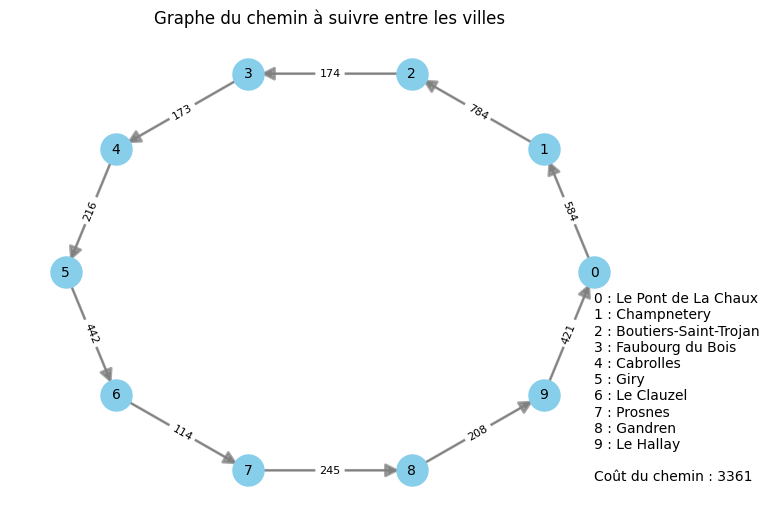

In [50]:
import itertools

def held_karp(dist, start=0):
    
    n = len(dist)
    C = {}

    for k in range(n):
        if k == start:
            continue
        C[(frozenset([start, k]), k)] = (dist[start][k][1], [start, k])

    for subset_size in range(2, n):
        for subset in itertools.combinations([i for i in range(n) if i != start], subset_size):
            S = frozenset((start,) + subset)
            for j in subset:
                prev_subset = S - {j}
                min_cost = float('inf')
                min_path = []

                for k in subset:
                    if k == j:
                        continue
                    prev_cost, prev_path = C.get((prev_subset, k), (float('inf'), []))
                    cost = prev_cost + dist[k][j][1]
                    if cost < min_cost:
                        min_cost = cost
                        min_path = prev_path + [j]

                C[(S, j)] = (min_cost, min_path)

    full_set = frozenset(range(n))
    min_cost = float('inf')
    min_path = []

    for k in range(n):
        if k == start:
            continue
        cost, path = C[(full_set, k)]
        total_cost = cost + dist[k][start][1]
        if total_cost < min_cost:
            min_cost = total_cost
            min_path = path + [start]

    return min_cost, min_path

min_cost, path = held_karp(printable_matrix, start=0)
print(f"Coût minimum : {min_cost}\nChemin : {path}")
generate_hamiltonian_graph(path, min_cost, printable_matrix, Cities)

In [ ]:
Heure_debut = 7
import random
from pyprobs import Probability as pr
# Définition d'une constante pour la valeur maximale
MAX = 2147483647


print(matrix)
ponderation_matrix = []

time_windows = []  # à compléter si nécessaire
def generate_ponderation_matrix(matrix):
    ponderation_matrix = []

    for i in range(len(matrix)):
        submatrix = []
        for j in range(len(matrix[i])):
            road_blocked = pr.prob(0.05)# 5% de probabilité
            road_cost = random.uniform(0.6, 1.4)

            if road_blocked or matrix[i][j][0] == 0:
                submatrix.append(MAX)
            else:
                distance = matrix[i][j][0]
                time = matrix[i][j][1]
                cost = int(distance * 0.7) + int(time * 0.5 * road_cost)
                submatrix.append(cost)

        ponderation_matrix.append(submatrix)

    return ponderation_matrix

import random

def generate_time_windows(num_cities, min_start=0, max_start=36000, min_window=3600, max_window=14400, seed=None):
    if seed is not None:
        random.seed(seed)

    time_windows = []
    for _ in range(num_cities):
        start = random.randint(min_start, max_start)
        window = random.randint(min_window, max_window)
        end = start + window
        time_windows.append((start, end))

    return time_windows


ponderation_matrix = generate_ponderation_matrix(matrix)
print(ponderation_matrix)
def calcul_fitness(chemin, matrice_ponderation, matrice_adjacente,heure_debut, time_windows):
    """
    Calcule la distance totale d'un chemin donné dans la matrice de distances.
    """
    ponderation_totale = 0

    for i in range(len(chemin) - 1):
        if matrice_adjacente[chemin[i]][chemin[i + 1]] == 0:
            return float('inf')
        if matrice_ponderation[chemin[i]][chemin[i + 1]] == MAX:
            return float('inf')
    if heure_debut + matrice_adjacente[chemin[i]][chemin[i + 1]][0] > time_windows[chemin[i + 1]][1]:
        ponderation_totale += matrice_ponderation[chemin[i]][chemin[i + 1]]
    return ponderation_totale

[[[0, 0], [20872.7, 438], [27791.3, 593], [14089.5, 337], [25736.2, 584], [13914.1, 292], [24465.1, 589], [15502.2, 396], [17181.1, 419], [29531.4, 760]], [[20928.4, 444], [0, 0], [9514.5, 173], [14020.1, 298], [34388.4, 891], [14287.7, 297], [8559, 174], [22278.7, 563], [29186, 714], [15715.9, 318]], [[27890.8, 600], [9510.9, 174], [0, 0], [18604.7, 474], [36530.9, 954], [20294.1, 473], [10598.4, 180], [25183.8, 640], [32108.1, 840], [9094.4, 216]], [[14109.1, 336], [14020.2, 297], [18748.8, 473], [0, 0], [33325.4, 860], [5326.3, 114], [19471.1, 437], [10650.9, 245], [16526, 407], [17884.3, 445]], [[26304.1, 587], [34216.6, 890], [36375.8, 951], [33098.5, 860], [0, 0], [32016.2, 784], [32066.3, 784], [36544.2, 975], [38223.1, 999], [42068.2, 1141]], [[13927.3, 291], [14271.3, 298], [20489.6, 474], [5313.2, 114], [32278.6, 787], [0, 0], [18512.7, 435], [14447.4, 274], [20322.5, 437], [19481.1, 445]], [[24517.7, 591], [8464, 174], [10636.6, 180], [19493, 439], [32164.4, 787], [18348.3, 